# Part II - Prosper Loan Data
## by Alex Y.


## Investigation Overview

Prosper Loan data has an in-house rating system for borrowers, and additionally contents credit score data of the Consumer Credit Rating Agency and others. This analysis found insights for risk assessment of lenders and borrowers alike, as well as evaluated the effectiveness of the different rating systems. 

The investigation found that the Prosper Rating and Score are fairly accurate for lenders to predict loan outcome an and therefore risk and profit margins.This rating system does not align with the rating of the Consumer Credit Agency, which needed to be evaluated differently. A major underlying causality for these outcomes however are the higher Interest rates for lower rated Borrowers. Further, the final observation that showed that loans are finished in most cases prior to the end of the term of the loan agreement allow a more efficient capital allocation for lenders.


## Dataset Overview

The dataset consists of more than 110K observations with 81 features. The latter are very detailed, and have several main features broken down into subcolumns, in most cases the main feature is adequate for investigation, as e.g. the _BorrowerAPR_ in total can be used for this investigation. Several features started recording data from 2009 onwards only, so while just a few features have large numbers of missing values, all other features are fairly complete and the datfaframe can easily divided into subsets for for specific investigations.

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [52]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Datetime conversions 
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)
df.DateCreditPulled =pd.to_datetime(df.DateCreditPulled)
df.FirstRecordedCreditLine = pd.to_datetime(df.FirstRecordedCreditLine)
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

# Convert alphabetic Prosper Rating to categoricalDtype and into correct order 
order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
df['ProsperRating (Alpha)'] = pd.Categorical(df['ProsperRating (Alpha)'], order)
                                             
# Subset of data with only ended loan interactions - "Completed", "Defaulted", "Chargedoff"
finished_loans = df.query("LoanStatus == 'Completed' or LoanStatus == 'Defaulted' or LoanStatus == 'Chargedoff'")

# timespan of the loan for finished loans
finished_loans['Timespan'] = finished_loans['ClosedDate'] - finished_loans['LoanOriginationDate']
# first convert the timespan to days to later convert to month for comparison in heatmap with agreed term
finished_loans.Timespan = finished_loans.Timespan.dt.days
# Extreme outliers/erros below zero are cut
finished_loans.Timespan = finished_loans.Timespan.mask(finished_loans.Timespan < 0, 0)
# conversion to months by division of average days per month in year (30,437)
finished_loans.Timespan = finished_loans.Timespan/30.437

# Visual of Timespan of finished loans - "finished" is used as definition for post loan analysis to not to confuse transactions
# with "completed" loans that are a subset of "finished" loans, which have been repaid in full in due time 


## Visualization 1: Bivariate Boxplot to investigate Interest Rate and Loan Outcome

After having investigated wether there is a clear effect of the Interest Rate on Loan adherence, it is shown that in particular Chargedoff Loans increase with higher Interest Rates. The visual is a subset of the dataset, that only considers finished loan life cycles.

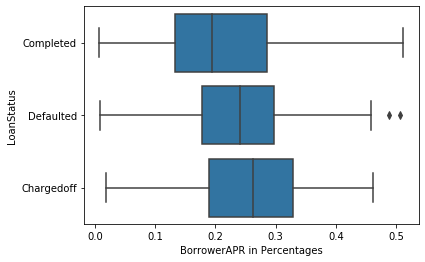

In [53]:
# Boxplot plot to investigate the relationship between Borrower APR and Loan Outcome
base = sb.color_palette()[0]
sb.boxplot(data=finished_loans, x='BorrowerAPR', y='LoanStatus', color=base)
plt.xlabel('BorrowerAPR in Percentages')
plt.show();

## Visualization 2: Multivariate Proof of Effectivenees of Prosper Rating System

This is performed by plotting the Prosper Rating in relation to Original Loan Amount and Delinquent Payments, the Rating System is shown to be highly effective.

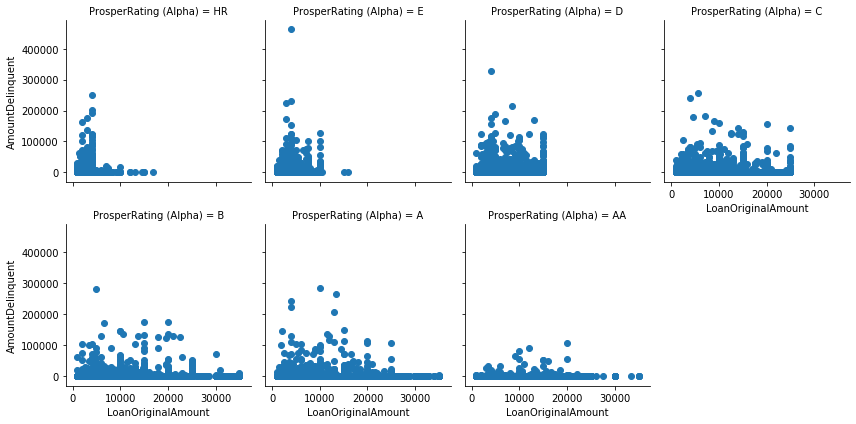

In [54]:
# Since the AverageCreditScore and the ProsperScore do not show significant correlation, 
#the effectiveness of the ProsperRating is investigated
plt.rcParams["figure.figsize"] =(12, 8)

g =sb.FacetGrid(data=df, col= 'ProsperRating (Alpha)', col_wrap=4)
g.map(plt.scatter, 'LoanOriginalAmount', 'AmountDelinquent');


## Visualization 3: A multivariate exploration in the Timespan of finished Loan transactions in relation to agreed Term, and break down in Prosper Ratings.

It was asked for wether the borrowers pay back for loan transactions end in differnet actual timespans than the loan agreement, which has turned out to be the case. 

It was found that overall the lifespan of a loan is significanlty shorter than the term, suggesting, that in partial cases subsequent MonthlyLoanPayments are delinquent, leading to early Chargeoff or Defaulted status, while on the contrary Loans are Completed ahead of time, likely for the borrowers to save high Interest Rates. Latter is concluded from the fact that mid-, and longer term loans (36-60 months) are paid earlier, the higher the Prosper Rating (highest is 1 > lowest is 7) . On the contrary short term loans are finished signficantly faster by lower rated borrowers, it is presumed that these short term loans for low-rated borrowers, are of of the highest APR.

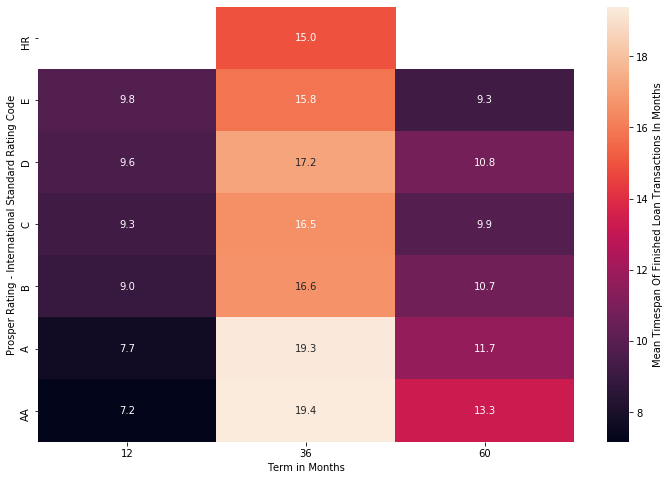

In [55]:
# Heatmap to display multivariate relations of ProsperRating, Term, and Timespan 
plt.figure(figsize=(12, 8))

cat_means = finished_loans.groupby(['Term','ProsperRating (Alpha)']).mean()['Timespan']
cat_means = cat_means.reset_index(name='Mean Timespan in months')
cat_means = cat_means.pivot(index = 'ProsperRating (Alpha)', values= 'Mean Timespan in months', columns='Term')

sb.heatmap(cat_means, annot = True, fmt = '.1f',
          cbar_kws = {'label' : 'Mean Timespan Of Finished Loan Transactions In Months'})
plt.xlabel('Term in Months')
plt.ylabel('Prosper Rating - International Standard Rating Code');

In [60]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_exploration_loan_data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_exploration_loan_data.ipynb to slides
[NbConvertApp] Writing 361926 bytes to Part_II_slide_deck_exploration_loan_data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_exploration_loan_data.slides.html
Use Control-C to stop this server
^C

Interrupted
